In [48]:
import os
import pandas as pd
import sklearn.metrics as metrics
import numpy as np
import matplotlib
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split

In [13]:
dir = 'C:\\Users\\faitsmc\Documents\dev\Kaggle-MNIST\\'

In [14]:
test = pd.read_csv(dir+'test.csv')
train = pd.read_csv(dir+'train.csv')

In [20]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


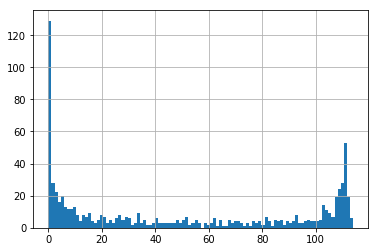

In [36]:
train.apply(np.std,axis=0).hist(bins=100)

In [39]:
model = KNN(n_neighbors=5,p=2,metric='minkowski')

In [49]:
[dftr,dftst] = train_test_split(train,test_size=0.25,random_state=42)

In [50]:
feature_list = list(set(train.columns.values) - set(['label']))
Xtr = dftr[feature_list]
Ytr = dftr['label']

model.fit(Xtr,Ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
Xtst = dftst[feature_list]
Ytst = dftst['label']

Ypred = model.predict(Xtst)

In [53]:
metrics.accuracy_score(Ytst,Ypred)

0.9666666666666667

In [ ]:
#Up next: GridSearchCV
#Also try filtering out all points that have standard deviation less than 100 and use only those in the model. 
#See how that affects the model.